#Internship Major Project

##Topic : **Crop Recommendation**
Problem Statement : Predict the type of crop based on various factors such as temperature, humidity, rainfall, soil pH and other nutrients. 

Data fields
- N - ratio of Nitrogen content in soil
-	P - ratio of Phosphorous content in soil
-	K - ratio of Potassium content in soil
-	temperature - temperature in degree Celsius
-	humidity - relative humidity in %
-	ph - ph value of the soil
-	rainfall - rainfall in mm

This problem is classification problem as dataset is labelled (i.e. supervised learning). We have predicted result using five classification algorithms.  
- Logistic regression
- Decision tree
- Random forest
- Support vector machine
- K-nearest Neighbor

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###1) Acquiring the Data

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
df.shape

(2200, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


###2) Preprocess the Data

In [ ]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [ ]:
X = df.drop('label', axis=1)
y = df['label']

In [ ]:
X

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [ ]:
y

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

###3) Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [ ]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
1064,92,85,51,29.221186,81.081836,5.740765,108.861647
485,18,55,23,21.998983,56.310068,6.985720,136.827431
1802,13,28,33,28.130115,95.648076,5.686973,151.076190
131,63,43,19,18.518168,55.531281,6.641906,90.988051
694,4,40,21,28.797281,80.457444,6.725551,44.300705
...,...,...,...,...,...,...,...
454,5,56,24,24.807102,45.011100,5.023115,188.492864
966,3,27,44,24.568112,92.030092,6.591303,110.963389
1856,10,24,27,27.572835,94.904857,5.708410,145.929893
1476,80,18,52,27.873174,91.148496,6.484800,24.052079


In [ ]:
X_test

,N,P,K,temperature,humidity,ph,rainfall
10,91,53,40,26.527235,81.417538,5.386168,264.614870
1132,12,31,26,35.787774,51.941903,5.395276,100.216061
97,60,55,45,21.408658,83.329319,5.935745,287.576693
1813,37,18,30,27.635513,99.348549,6.384884,157.917154
345,17,77,24,20.769522,18.931469,5.568457,109.019371
...,...,...,...,...,...,...,...
156,84,44,21,21.869274,61.910449,5.850440,107.268193
1170,18,20,26,31.665247,51.985946,5.435841,89.980243
1827,11,6,25,28.691648,96.652487,6.081568,178.963546
1459,95,16,46,27.076726,90.143626,6.746695,24.451465


###4) Train the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=1)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(random_state=1)))
models.append(('Random Forest Classifier', RandomForestClassifier(n_estimators=75,criterion='entropy',random_state=1)))
models.append(('Support Vector Machine', SVC(kernel='rbf',random_state=1)))
models.append(('K Neighbors Classifier', KNeighborsClassifier(n_neighbors=5)))

In [ ]:
model_name = []
accuracies = []

for name,model in models:
  result = model.fit(X_train,y_train)
  predictions = result.predict(X_test)
  accuracy = accuracy_score(y_test, predictions)
  model_name.append(name)
  accuracies.append(accuracy)

for i in range(len(model_name)):
  print(model_name[i]," : ",accuracies[i])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression  :  0.9522727272727273
Decision Tree Classifier  :  0.9931818181818182
Random Forest Classifier  :  0.9954545454545455
Support Vector Machine  :  0.990909090909091
K Neighbors Classifier  :  0.9772727272727273


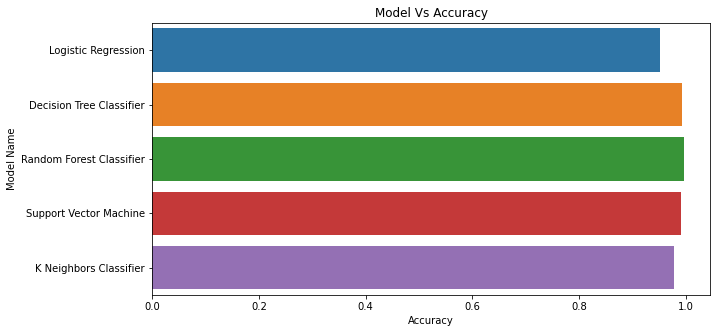

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Model Vs Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model Name")
sns.barplot(y=model_name, x=accuracies, saturation=0.8)

From the above graph, we have come to a conclusion that Random Forest Classifier and Decision Tree Classifier has the best accuracy among all. So we proceeded with Random Forest Classifier as a best-suited model for our given problem statement.

In [ ]:
my_model = RandomForestClassifier(n_estimators=75,criterion='entropy',random_state=1)
result = my_model.fit(X_train,y_train)

###5) Test the Model

In [ ]:
predictions = result.predict(X_test)
predictions[:100]

array(['rice', 'mango', 'rice', 'coconut', 'kidneybeans', 'cotton',
       'orange', 'jute', 'lentil', 'lentil', 'orange', 'apple',
       'kidneybeans', 'papaya', 'blackgram', 'mango', 'lentil', 'papaya',
       'cotton', 'muskmelon', 'cotton', 'cotton', 'watermelon',
       'blackgram', 'banana', 'apple', 'muskmelon', 'banana', 'mothbeans',
       'pigeonpeas', 'chickpea', 'kidneybeans', 'pomegranate', 'jute',
       'grapes', 'mungbean', 'apple', 'jute', 'mothbeans', 'orange',
       'grapes', 'kidneybeans', 'coconut', 'coffee', 'pigeonpeas',
       'kidneybeans', 'rice', 'mothbeans', 'grapes', 'rice', 'grapes',
       'chickpea', 'apple', 'watermelon', 'coconut', 'cotton', 'mungbean',
       'watermelon', 'apple', 'jute', 'pomegranate', 'jute', 'apple',
       'coffee', 'muskmelon', 'muskmelon', 'pomegranate', 'jute',
       'muskmelon', 'cotton', 'cotton', 'coffee', 'pigeonpeas',
       'mothbeans', 'blackgram', 'jute', 'coconut', 'cotton',
       'watermelon', 'banana', 'maize', 

In [ ]:
accuracy_score(y_test, predictions)

0.9954545454545455

In [ ]:
from sklearn.metrics import classification_report
print("Classification report :\n",classification_report(y_test, predictions))

Classification report :
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        19
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        19
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        19
      cotton       1.00      1.00      1.00        26
      grapes       1.00      1.00      1.00        19
        jute       1.00      0.92      0.96        26
 kidneybeans       1.00      1.00      1.00        16
      lentil       1.00      1.00      1.00        25
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        17
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        20
  

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, predictions)

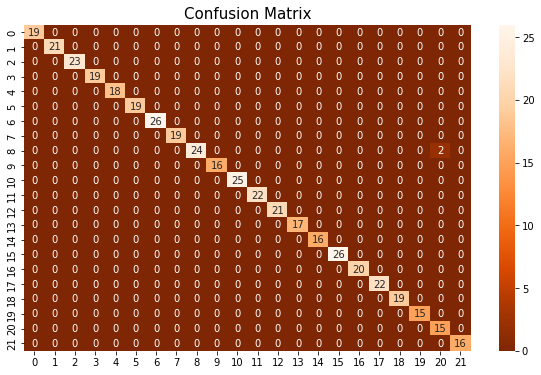

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_mat, annot=True, fmt="1.0f", cmap="Oranges_r")
plt.title("Confusion Matrix", size = 15);

###6) Deploy the Model

In [ ]:
new_pred = result.predict([[90,42,43,20.87974371,82.00274423,6.502985292,202.9355362]])  #1st line
new_pred 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['rice'], dtype=object)

In [ ]:
new_pred2 = result.predict([[37,73,21,29.50304807,63.46513414,5.560224583,189.5208915]])   #475 line
new_pred2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['pigeonpeas'], dtype=object)

In [ ]:
new_pred3 = result.predict([[12,31,26,35.7877738,51.94190321,5.395275719,100.2160615]])   #1134 line
new_pred3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['mango'], dtype=object)

In [ ]:
new_pred4 = result.predict([[115,48,16,25.54359718,84.09229796,7.175934962,88.94245493]])   
new_pred4

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['cotton'], dtype=object)